# Lab 4 - Linear models
### We focus on models in the form 

In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


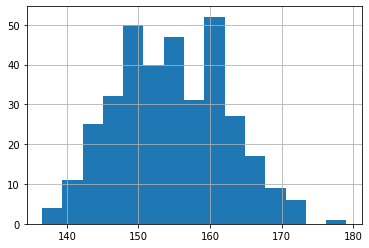

In [3]:
plt.hist(d['height'], bins=15)
plt.grid()
plt.show()

In [4]:
print(f"mean = {np.mean(d['height'])}, std = {np.std(d['height'])}")

mean = 154.5970926136364, std = 7.73132668454304


## Task 1. Prior predictive checks

In [5]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:
R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [7]:
df = sim.draws_pd()
df.head()

,lp__,accept_stat__,mu,std_dev,height
0,0.0,0.0,172.957,18.88590,148.929
1,0.0,0.0,154.893,8.05289,156.875
2,0.0,0.0,162.391,26.32670,187.950
3,0.0,0.0,157.888,17.99470,157.491
4,0.0,0.0,163.184,13.28940,159.050


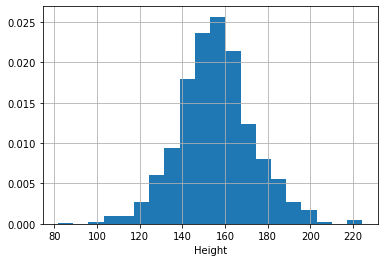

In [8]:
plt.hist(df['height'], density=True, bins=20)
plt.grid()
plt.xlabel("Height")
plt.show()

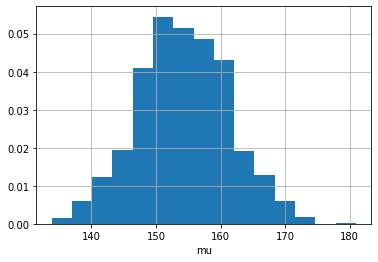

In [9]:
plt.hist(df['mu'], density=True, bins=15)
plt.grid()
plt.xlabel("mu")
plt.show()

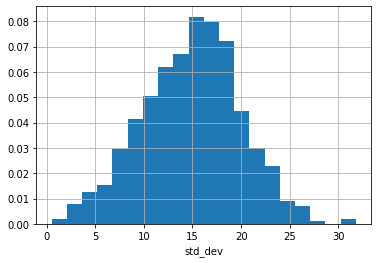

In [10]:
plt.hist(df['std_dev'], density=True, bins=20)
plt.grid()
plt.xlabel("std_dev")
plt.show()

In [11]:
print(f"height mean = {np.mean(df['height'])}\nmu mean = {np.mean(df['mu'])}\nstd_dev mean = {np.mean(df['std_dev'])}")

height mean = 155.38243549999999
mu mean = 154.268451
std_dev mean = 14.909213038999999


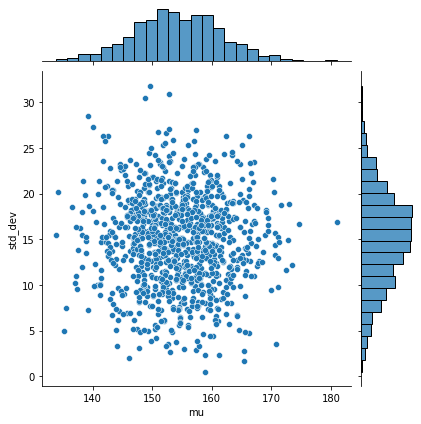

In [12]:
sns.jointplot(data=df, x='mu', y='std_dev')
plt.show()

## Task 2. Model fit and evaluation

In [13]:

model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [14]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [15]:
df_fit = fit.draws_pd()
df_fit.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,std_dev,y_pred
0,-890.255,0.997746,0.604288,3.0,7.0,0.0,890.786,154.626,7.52854,149.700
1,-890.105,0.798037,0.604288,2.0,3.0,0.0,892.110,154.411,7.64039,159.423
2,-890.128,0.982348,0.604288,2.0,3.0,0.0,890.366,154.838,7.67764,159.262
3,-890.020,0.895380,0.604288,2.0,3.0,0.0,891.079,154.497,7.64770,137.989
4,-890.920,0.860787,0.604288,3.0,7.0,0.0,891.528,154.992,8.09893,146.129


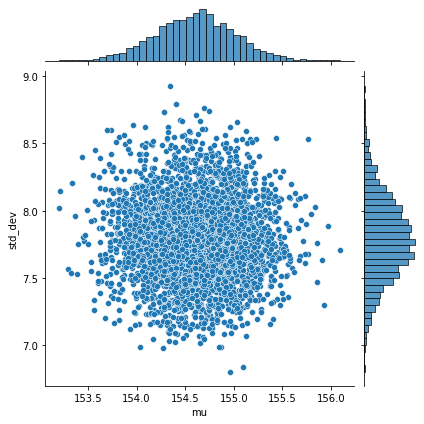

In [16]:
sns.jointplot(data=df_fit, x='mu', y='std_dev')
plt.show()

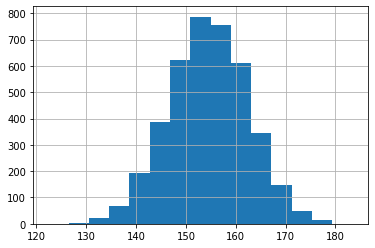

In [17]:
plt.hist(df_fit['y_pred'], bins=15)
plt.grid()
plt.show()

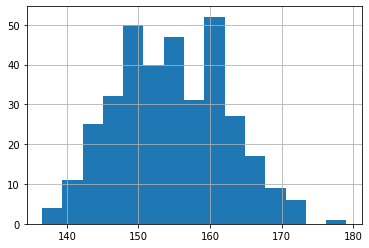

In [18]:
plt.hist(d['height'], bins=15)
plt.grid()
plt.show()

In [19]:
print(f"mean = {np.mean(df_fit['y_pred'])}")

mean = 154.52959325


## Task 3. Adding predictor to the model - weight

In [20]:
d['c_weight'] = d['weight'] - d['weight'].mean()

In [21]:
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

## Task 4. Prior predictive checks

In [22]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/lab4/height_2a_ppc.stan to exe file /home/lab4/height_2a_ppc
INFO:cmdstanpy:compiled model executable: /home/lab4/height_2a_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [23]:
df_2 = sim.draws_pd()
df_2.head()

,lp__,accept_stat__,alpha,beta,mu,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,172.957,0.777181,8.63866,163.2410,150.643,165.278,174.014,183.734,...,192.436,199.163,196.703,186.156,172.473,180.271,183.078,192.533,188.906,192.508
1,0.0,0.0,145.608,-0.006780,14.98150,163.9020,157.077,156.775,163.339,163.860,...,185.571,145.155,132.031,143.163,131.235,153.226,129.900,144.000,165.032,144.349
2,0.0,0.0,151.011,-1.138640,8.89063,179.4540,164.445,163.952,170.015,167.396,...,152.737,124.663,149.160,137.953,151.632,133.569,141.585,135.989,130.901,132.411
3,0.0,0.0,147.125,-0.254452,12.46040,167.2270,142.280,147.621,138.290,147.255,...,150.996,145.801,148.587,161.419,137.894,137.235,154.165,136.909,147.765,138.104
4,0.0,0.0,147.046,1.671020,11.48630,93.8039,118.082,116.959,118.164,143.009,...,185.388,183.476,161.113,172.647,170.105,167.595,167.761,183.656,182.648,167.780


In [24]:
weight = np.linspace(d.c_weight.min(),d.c_weight.max(), R).reshape((R, 1))
val = df_2['alpha'].values + weight * df_2['beta'].values

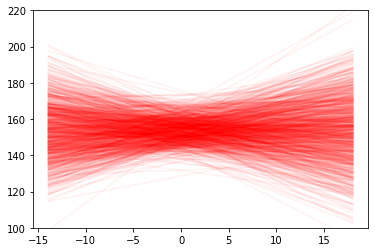

In [25]:
xs = np.ones((1, R)) * weight
plt.plot(xs, val, 'r', alpha=0.05)
plt.ylim(100, 220)
plt.show()

In [26]:
heights = df_2.loc[:, 'height[1]':'height[50]'].values

In [27]:
heights.min()

0.0

In [28]:
heights.max() # OK 

258.794

## Task 5. Modifying prior

In [29]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [30]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [31]:
df_3 = sim.draws_pd()
df_3.head()

,lp__,accept_stat__,alpha,beta,mu,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,172.957,2.175330,8.63866,143.780,132.0920,147.6390,157.2850,167.916,...,209.408,217.046,215.496,205.860,193.089,201.797,205.515,215.881,213.165,217.678
1,0.0,0.0,145.608,0.993243,14.98150,149.983,143.8090,144.1580,151.3730,152.546,...,197.711,157.946,145.473,157.257,145.981,168.623,145.948,160.699,182.383,162.351
2,0.0,0.0,151.011,0.320255,8.89063,159.147,145.0890,145.5450,152.5590,150.890,...,170.446,143.323,168.770,158.513,173.143,156.030,164.997,160.351,156.213,158.674
3,0.0,0.0,147.125,0.775342,12.46040,152.893,128.6170,134.6290,125.9680,135.604,...,163.497,158.972,162.429,175.933,153.078,153.090,170.690,154.106,165.633,156.642
4,0.0,0.0,147.046,5.317560,11.48630,43.046,69.6994,70.9527,74.5328,101.754,...,229.654,230.117,210.130,224.039,223.873,223.738,226.279,244.551,245.918,233.426


In [32]:
val = df_3['alpha'].values + weight * df_3['beta'].values

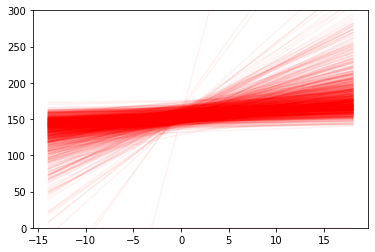

In [33]:
plt.plot(xs, val, 'r', alpha=0.05)
plt.ylim(0, 300)
plt.show()

In [34]:
heights = df_3.loc[:, 'height[1]':'height[50]'].values

In [35]:
heights.min()

-548.188

In [36]:
heights.max() # NOT OK

1032.67

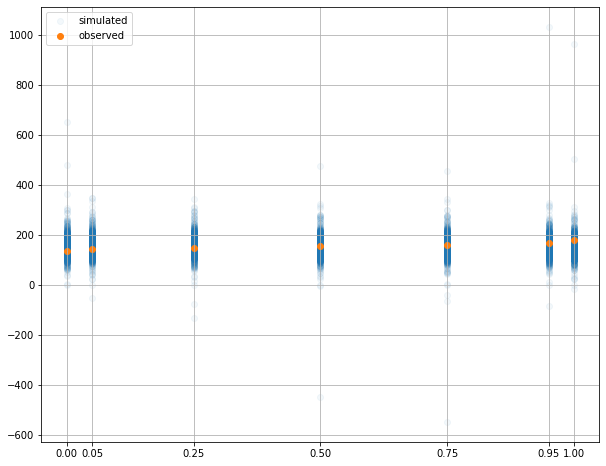

In [37]:
q = [0., 0.05, 0.25, 0.5, 0.75, 0.95, 1.]
quantiles = np.quantile(heights, q, axis=1)
data_quantiles = np.quantile(d.height, q)

plt.figure(figsize=(10, 8))
plt.scatter(q * np.ones((R, 1)), quantiles, alpha=0.05, label='simulated')
plt.scatter(q, data_quantiles, label='observed')
plt.xticks(q)
plt.legend()
plt.grid()
plt.show()

## Task 6. Fitting and evaluating

In [38]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [39]:
N = 100
data_fit = {'N': N, 'weight': d.weight.values[:N], 'heights': d.height.values[:N]}

In [40]:
fit=model_2_fit.sample(data=data_fit,seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


In [41]:
df_4 = fit.draws_pd()
df_4.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,std_dev,beta,...,y_pred[91],y_pred[92],y_pred[93],y_pred[94],y_pred[95],y_pred[96],y_pred[97],y_pred[98],y_pred[99],y_pred[100]
0,-231.545,0.757829,0.129085,2.0,7.0,0.0,232.929,119.565,5.16570,0.760087,...,170.722,157.374,157.151,158.359,139.084,159.230,148.717,156.069,159.375,149.512
1,-231.366,0.913259,0.129085,4.0,15.0,0.0,232.580,119.739,5.21469,0.778263,...,162.993,149.886,155.621,163.420,163.687,156.039,140.448,162.449,160.369,152.426
2,-231.024,0.981328,0.129085,4.0,23.0,0.0,232.458,118.039,5.87692,0.792092,...,146.074,152.087,155.067,153.991,147.138,160.310,153.401,148.405,153.323,150.514
3,-230.436,0.901101,0.129085,5.0,35.0,0.0,231.734,122.955,5.71194,0.696795,...,157.744,164.154,151.200,163.135,152.564,155.142,144.809,159.196,159.756,150.781
4,-230.426,0.983854,0.129085,4.0,31.0,0.0,231.192,119.504,5.42249,0.775872,...,158.962,158.460,150.552,156.718,156.058,161.686,153.671,156.615,161.646,155.912


In [42]:
heights = df_4.loc[:, 'y_pred[1]':f'y_pred[{N}]'].values

In [43]:
weights = np.linspace(data_fit['weight'].min(), data_fit['weight'].max(), N).reshape((N, 1))
val = df_4['beta'].values * weights + df_4['alpha'].values

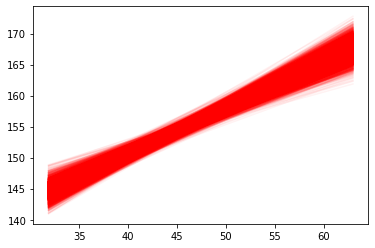

In [44]:
xs = np.ones((1, 4000)) * weights
plt.plot(xs, val, 'r', alpha=0.05)
plt.show()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)




chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


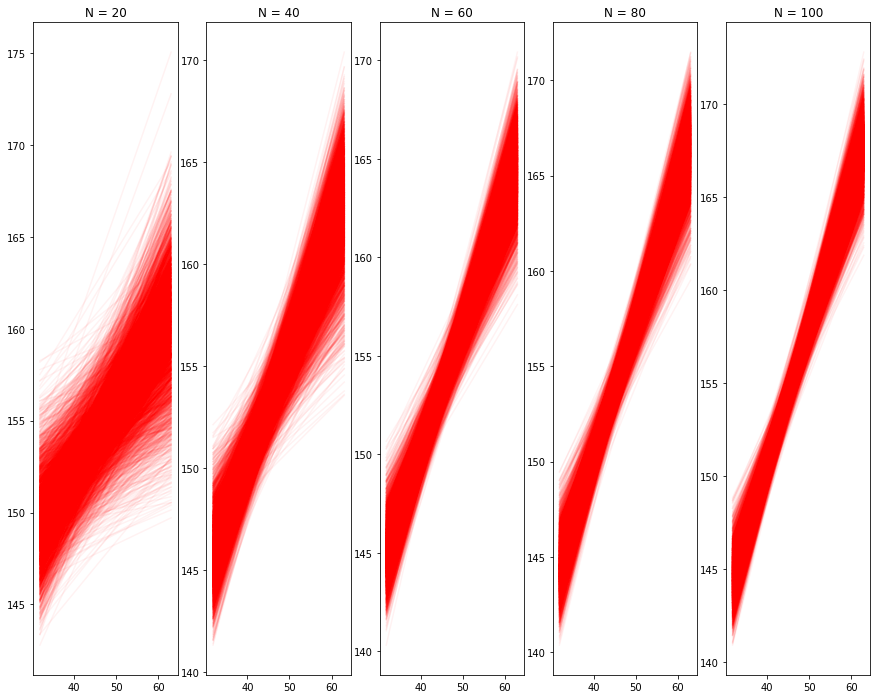

In [45]:
for i, N in enumerate([20, 40, 60, 80, 100]):
    data_fit = {'N': N, 'weight': d.weight.values[:N], 'heights': d.height.values[:N]}
    fit=model_2_fit.sample(data=data_fit,seed=29042020)
    df_temp = fit.draws_pd()
    weights = np.linspace(data_fit['weight'].min(), data_fit['weight'].max(), N).reshape((N, 1))
    val = df_temp['beta'].values * weights + df_temp['alpha'].values
    xs = np.ones((1, 4000)) * weights
    plt.subplot(1, 5, i+1)
    plt.plot(xs, val, 'r', alpha=0.05)
    plt.title(f'N = {N}')
fig = plt.gcf()
fig.set_size_inches(15, 12)
plt.show()

In [46]:
heights = df_temp.loc[:, 'y_pred[1]':f'y_pred[{N}]'].values

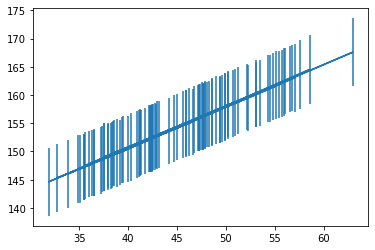

In [47]:
y = heights.mean(axis=0)
x = data_fit['weight']
error = heights.std(axis=0)
plt.errorbar(x, y, error)
plt.show()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


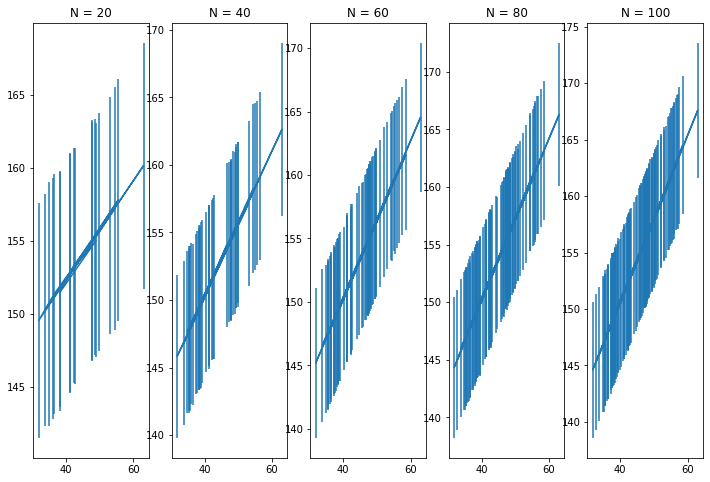

In [48]:
for i, N in enumerate([20, 40, 60, 80, 100]):
    data_fit = {'N': N, 'weight': d.weight.values[:N], 'heights': d.height.values[:N]}
    fit=model_2_fit.sample(data=data_fit,seed=29042020)
    df_temp = fit.draws_pd()
    heights = df_temp.loc[:, 'y_pred[1]':f'y_pred[{N}]'].values
    y = heights.mean(axis=0)
    x = data_fit['weight']
    error = heights.std(axis=0)
    plt.subplot(1, 5, i+1)
    plt.errorbar(x, y, error)
    plt.title(f'N = {N}')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

## Task 7. Extending the model

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


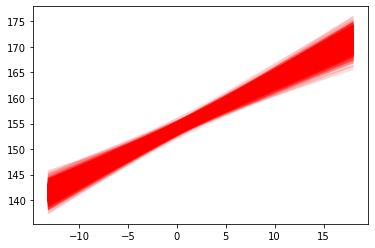

In [49]:
N = 100
data_fit = {'N': N, 'weight': d.c_weight.values[:N], 'heights': d.height.values[:N]}
fit=model_2_fit.sample(data=data_fit,seed=29042020)
df = fit.draws_pd()

weights = np.linspace(data_fit['weight'].min(), data_fit['weight'].max(), N).reshape((N, 1))
val = df['beta'].values * weights + df['alpha'].values
xs = np.ones((1, 4000)) * weights
plt.plot(xs, val, 'r', alpha=0.05)
plt.show()

In [50]:
model_3_fit=CmdStanModel(stan_file='height_3_fit.stan')
N = 100
data_fit = {'N': N, 'weight': d.c_weight.values[:N], 'heights': d.height.values[:N]}
fit=model_3_fit.sample(data=data_fit,seed=29042020)
df = fit.draws_pd()
df.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,std_dev,beta,...,y_pred[91],y_pred[92],y_pred[93],y_pred[94],y_pred[95],y_pred[96],y_pred[97],y_pred[98],y_pred[99],y_pred[100]
0,-230.876,0.828321,0.617763,2.0,3.0,0.0,231.123,153.884,6.93420,0.853769,...,161.457,157.356,140.871,151.754,151.467,161.459,154.868,162.138,166.707,144.071
1,-228.149,0.979385,0.617763,2.0,3.0,0.0,231.595,153.832,6.30298,0.874057,...,154.126,160.608,153.245,153.314,138.923,159.535,135.383,170.304,156.853,162.796
2,-226.992,0.883462,0.617763,3.0,7.0,0.0,231.414,153.834,5.73877,0.910701,...,174.595,164.975,147.957,166.867,142.069,161.763,151.437,163.968,146.513,151.554
3,-226.919,0.990498,0.617763,3.0,7.0,0.0,227.944,153.220,5.46042,0.882340,...,161.455,160.007,143.840,152.037,152.789,179.137,149.504,153.970,161.179,161.452
4,-227.682,0.851650,0.617763,3.0,7.0,0.0,228.947,153.103,5.38068,1.052720,...,160.390,154.211,155.342,152.834,152.850,149.363,146.721,165.909,167.068,151.605


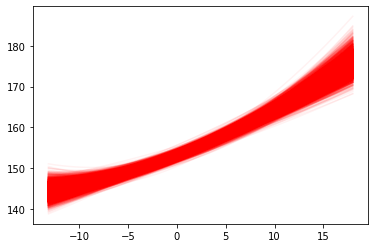

In [51]:
weights = np.linspace(data_fit['weight'].min(), data_fit['weight'].max(), N).reshape((N, 1))
val = df['beta'].values * weights + df['gamma'].values * weights ** 2 + df['alpha'].values
xs = np.ones((1, 4000)) * weights
plt.plot(xs, val, 'r', alpha=0.05)
plt.show()